In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
data=pd.read_csv("D:\DSBDL_pract\Pract2\StudentsPerformance_modified.csv")

In [18]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [20]:
data['math score'].unique()

array(['72', '69', '90', '47', '76', '71', '88', '40', '64', '38', '58',
       '65', '78', '50', nan, '74', '73', '67', '70', '62', '63', '56',
       '81', '75', '57', '55', '53', '59', '66', '82', '77', '33', '52',
       '0', '79', '39', '45', '60', '61', '41', '49', '44', '30', '80',
       '42', '27', '43', '68', '85', '98', '87', '54', '51', '99', '84',
       '91', '83', '89', '22', '100', '96', '94', '46', '97', '48', '35',
       '34', '86', '92', '37', '28', '24', '113', '123', '?', '-89', '26',
       '334', '95', '36', '29', '32', '93', '19', '23', '8'], dtype=object)

In [21]:
data=data.drop(data[data['math score']<'0'].index)

In [22]:
data=data.drop(data[data['math score']=='?'].index)

In [23]:
data['math score']=data['math score'].fillna(method='ffill')

C:\Users\rahul patil\AppData\Local\Temp\ipykernel_13008\158048381.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['math score']=data['math score'].fillna(method='ffill')


In [24]:
data['math score']=data['math score'].astype('int64')

In [25]:
data=data.drop(data[data['reading score']<0].index)

In [26]:
data['reading score']=data['reading score'].fillna(method='ffill')

C:\Users\rahul patil\AppData\Local\Temp\ipykernel_13008\4256327379.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['reading score']=data['reading score'].fillna(method='ffill')


In [27]:
data['reading score']=data['reading score'].astype('int64')

In [28]:
data=data.drop(data[data['writing score']<0].index)

In [29]:
data['writing score']=data['writing score'].fillna(method='ffill')

C:\Users\rahul patil\AppData\Local\Temp\ipykernel_13008\2079220147.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['writing score']=data['writing score'].fillna(method='ffill')


In [30]:
data['writing score']=data['writing score'].astype('int64')

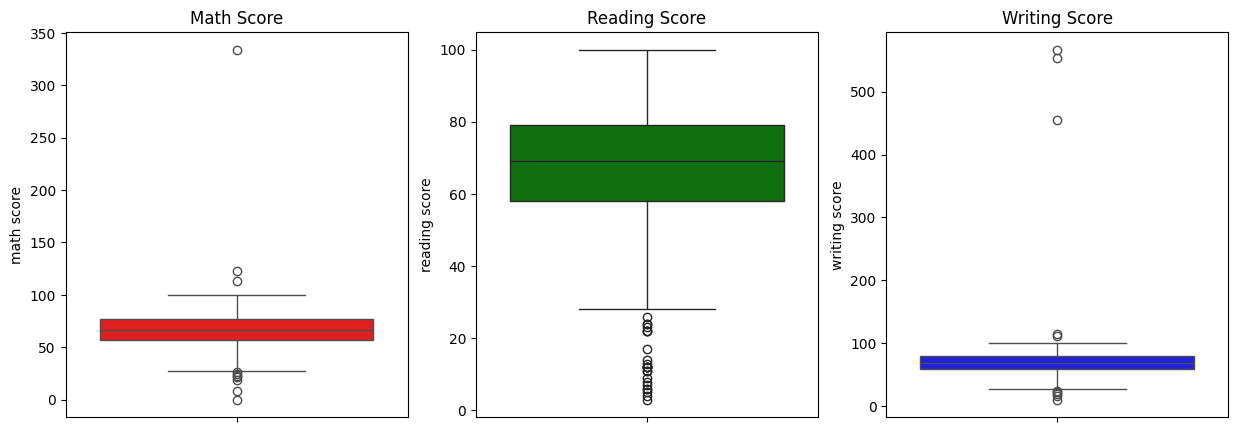

In [36]:
fig,axs=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(data['math score'],ax=axs[0],color='r')
axs[0].set_title("Math Score")
sns.boxplot(data['reading score'],ax=axs[1],color='g')
axs[1].set_title("Reading Score")
sns.boxplot(data['writing score'],ax=axs[2],color='b')
axs[2].set_title("Writing Score")
plt.show()

In [38]:
Q1=data['math score'].quantile(0.25)
Q3=data['math score'].quantile(0.75)

IQR=Q3-Q1

lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)

data=data[(data['math score']>=lower) & (data['math score']<=upper)]

In [39]:
Q1=data['reading score'].quantile(0.25)
Q3=data['reading score'].quantile(0.75)

IQR=Q3-Q1

lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)

data=data[(data['reading score']>=lower) & (data['reading score']<=upper)]

In [40]:
Q1=data['writing score'].quantile(0.25)
Q3=data['writing score'].quantile(0.75)

IQR=Q3-Q1

lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)

data=data[(data['writing score']>=lower) & (data['writing score']<=upper)]

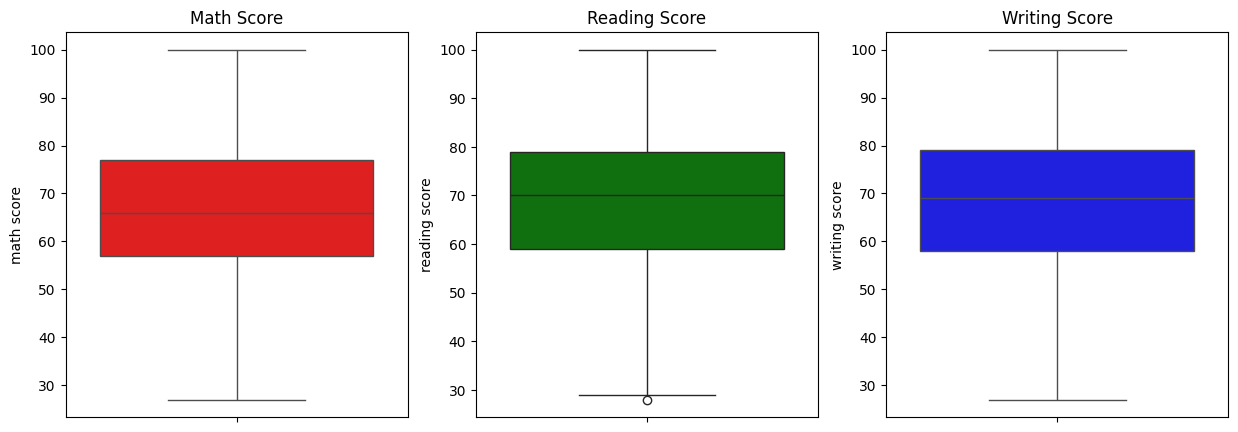

In [41]:
fig,axs=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(data['math score'],ax=axs[0],color='r')
axs[0].set_title("Math Score")
sns.boxplot(data['reading score'],ax=axs[1],color='g')
axs[1].set_title("Reading Score")
sns.boxplot(data['writing score'],ax=axs[2],color='b')
axs[2].set_title("Writing Score")
plt.show()

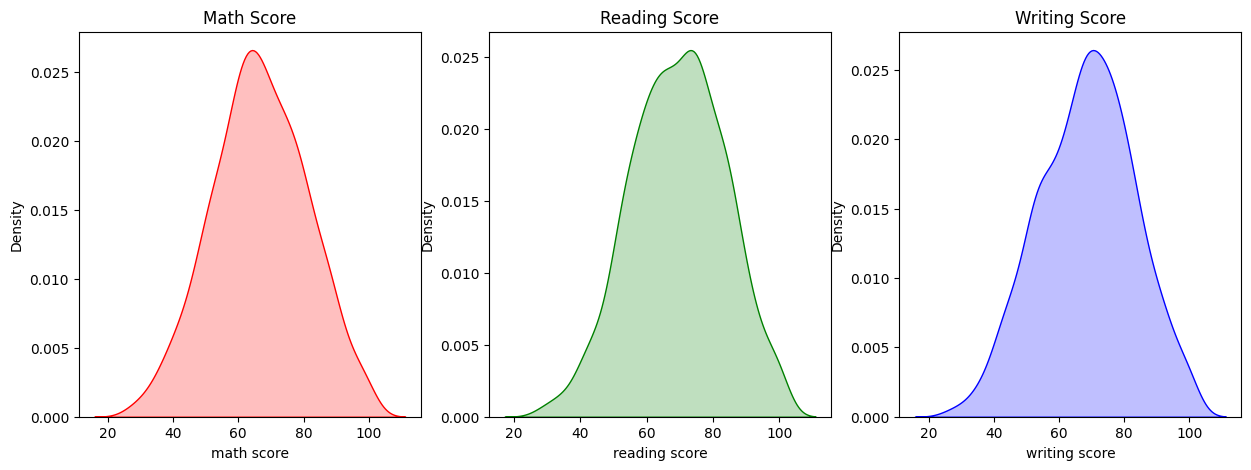

In [43]:
fig,axs=plt.subplots(1,3,figsize=(15,5))

sns.kdeplot(data['math score'],ax=axs[0],color='r',fill=True)
axs[0].set_title("Math Score")
sns.kdeplot(data['reading score'],ax=axs[1],color='g',fill=True)
axs[1].set_title("Reading Score")
sns.kdeplot(data['writing score'],ax=axs[2],color='b',fill=True)
axs[2].set_title("Writing Score")
plt.show()

In [45]:
print('Math score\n')
print(f"Skewness before transformation : {data['math score'].skew()}\n")
data['math score']=np.sqrt(data['math score'])
print(f"Skewness after transformation : {data['math score'].skew()}\n")

print('Reading score\n')
print(f"Skewness before transformation : {data['reading score'].skew()}\n")
data['reading score']=np.sqrt(data['reading score'])
print(f"Skewness after transformation : {data['reading score'].skew()}\n")

print('Writing score\n')
print(f"Skewness before transformation : {data['writing score'].skew()}\n")
data['writing score']=np.sqrt(data['writing score'])
print(f"Skewness after transformation : {data['writing score'].skew()}\n")

Math score

Skewness before transformation : -0.040277992952125995

Skewness after transformation : -0.33917063505540707

Reading score

Skewness before transformation : -0.12076539507512628

Skewness after transformation : -0.40707453605945426

Writing score

Skewness before transformation : -0.13044670008484757

Skewness after transformation : -0.4149078946980843

